# Exploring and Clustering Asian Restaurants in Austin

`Author: Andersen Lin`<br><br>
`Date: May 29, 2020`<br><br>
`GitHub:` __[Link to the GitHub repository of my capstone course projects](https://github.com/Andersen1997/Applied-Data-Science-Capstone-with-Python)__ <br><br>
`LinkedIn:` __[Feel free to connect me on LinkedIn](https://www.linkedin.com/in/andersen-lin/)__

<div style="font-size:16px">
<h3><a id = "0"><font color = black>Table of Contents</font></a></h3>
<ol>
    <li><a href = "#1">Introduction</a></li>
    <li><a href = "#2">Data</a></li>
    <li><a href = "#3">Methodology</a></li>
    <li><a href = "#4">Results</a></li>
    <li><a href = "#5">Discussion</a></li>
    <li><a href = "#6">Conclusion</a></li>
    <li><a href = "#7">References</a></li>
</ol>
</div>
<div class="alert alert-block alert-warning" style="font-size:16px">
<b>Note:</b> This notebook is mainly used for the capstone project of Applied Data Science Capstone by IBM on Coursera. It is shared on my GitHub repository for peer-to-peer review and grading. 
</div>

<h2><a id = "1">1. Introduction</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

As the capital city of the state of Texas, Austin is the cultural and economic center of the Round Rock-Austin metropolitan area. Austin is home to almost 1 million residents estimated in 2019, with around 200 thousand new residents from 2010, it is one of the fastest-growing cities in the United States [1]. 

Being famous for its diversity, Austin is a city with people of various ethnic and cultural backgrounds. Among the fast-growing population in the city, the Asian community has been the fastest growing one in the country since 2000 [2]. 

As a result, Austin is one of the ideal places for investors to put their money in a restaurant concept in the 2020s, especially into Asian restaurants. However, when it comes to starting a business in an area, there are numerous factors to be taken into consideration. 

The objective of this project is to provide intuitive visualization tools to assist in the decision-making process of opening an Asian restaurant in Austin by analyzing existing ones in neighborhoods from a data science perspective. 

<h2><a id = "2">2. Data</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

To address the problem, below is a list of data we need for further analysis: 

1. To present users with an interactive map, we need `folium` to render a map and allow us to put additional information
2. To localize Austin on the map, we need `geopy` to get the geographic coordinate of Austin
3. To assist in finding a location to open an Asian restaurant from a neighborhood basis. We need a GeoJSON file [3] that gives us the coordinates of boundaries of neighborhoods in Austin
4. To clearly display the number of existing Asian restaurants in each neighborhood. We need `folium` to draw choropleth maps
5. To get a list of existing Asian restaurants in Austin [4], we need `Foursquare API` to explore restaurants based on given locations

***

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
from geopy.geocoders import Nominatim

### 2.1 Get geographic coordinates of Austin for map initialization

In [4]:
# get geographical coordinates of Austin
address = 'Austin, Texas'

geolocator = Nominatim(user_agent = "au_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin is 30.2711286, -97.7436995.


### 2.2 Get GeoJSON with Austin neighborhoods central coordinates and boundaries

* Retrieved from a public dataset [3]
* Boundaries are used to plot a choropleth map that shows the number of Asian restaurants nearby for each neighborhood
* Central coordinates are used to add markers for each neighborhood with pop-up text on the map

In [5]:
# get geographic coordinates of neighborhoods in Austin [1]
geojson = pd.read_json(r'neighborhoods_austin.geojson')
geojson['features']

0     {'type': 'Feature', 'geometry': {'type': 'Poly...
1     {'type': 'Feature', 'geometry': {'type': 'Poly...
2     {'type': 'Feature', 'geometry': {'type': 'Poly...
3     {'type': 'Feature', 'geometry': {'type': 'Poly...
4     {'type': 'Feature', 'geometry': {'type': 'Poly...
5     {'type': 'Feature', 'geometry': {'type': 'Mult...
6     {'type': 'Feature', 'geometry': {'type': 'Poly...
7     {'type': 'Feature', 'geometry': {'type': 'Poly...
8     {'type': 'Feature', 'geometry': {'type': 'Poly...
9     {'type': 'Feature', 'geometry': {'type': 'Poly...
10    {'type': 'Feature', 'geometry': {'type': 'Poly...
11    {'type': 'Feature', 'geometry': {'type': 'Poly...
12    {'type': 'Feature', 'geometry': {'type': 'Poly...
13    {'type': 'Feature', 'geometry': {'type': 'Poly...
14    {'type': 'Feature', 'geometry': {'type': 'Poly...
15    {'type': 'Feature', 'geometry': {'type': 'Poly...
16    {'type': 'Feature', 'geometry': {'type': 'Poly...
17    {'type': 'Feature', 'geometry': {'type': '

In [6]:
from pandas.io.json import json_normalize

In [7]:
# normalize json file with nested lists to a dataframe
df = json_normalize(geojson["features"])

df.head()

/home/andersen97/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


type geometry.type                               geometry.coordinates  \
0  Feature       Polygon  [[[-97.6910269669999, 30.249541061000052], [-9...   
1  Feature       Polygon  [[[-97.7473857379999, 30.262583397000064], [-9...   
2  Feature       Polygon  [[[-97.6538919249999, 30.302898013000053], [-9...   
3  Feature       Polygon  [[[-97.75678372799987, 30.265759644000063], [-...   
4  Feature       Polygon  [[[-97.71527091799992, 30.348762051000044], [-...   

  properties.city   properties.name properties.regionid  \
0          Austin  Johnston Terrace              271442   
1          Austin           Bouldin              271303   
2          Austin           MLK 183              276459   
3          Austin            Zilker              271667   
4          Austin         Crestview              271339   

                    properties.geo_point_2d properties.county properties.state  
0   [30.258532486742006, -97.6846045905852]            Travis               TX  
1   [30.25187995040187, -97.75555649172945]            Travis               TX  
2  [30.278141270768568, -97.67172524590252]            Travis               TX  
3    [30.2552784357782, -97.76834999118768]            Travis               TX  
4  [30.346569491380357, -97.72505347536026]            Travis               TX

#### Clean the GeoJSON data to extract neighborhood names and coordinates only

In [8]:
# extract only properties names and their geographic coordinates
df_neiaus = df[['properties.name', 'properties.geo_point_2d']]
df_locaus = pd.DataFrame(df_neiaus['properties.geo_point_2d'].tolist(), columns = ['Latitude', 'Longitude'])
df_neiaus = df_neiaus.drop(columns = ['properties.geo_point_2d'])
df_neiaus = pd.concat([df_neiaus, df_locaus], axis = 1, ignore_index = True)
df_neiaus.columns = ['Neighborhood', 'Latitude', 'Longitude']

print('There are {} neighborhoods in total.'.format(df_neiaus.shape[0]))
df_neiaus

There are 66 neighborhoods in total.


Neighborhood   Latitude  Longitude
0           Johnston Terrace  30.258532 -97.684605
1                    Bouldin  30.251880 -97.755556
2                    MLK 183  30.278141 -97.671725
3                     Zilker  30.255278 -97.768350
4                  Crestview  30.346569 -97.725053
5                Onion Creek  30.121934 -97.791569
6                South Lamar  30.237340 -97.780812
7                   Rosedale  30.317221 -97.748310
8                  Riverside  30.239516 -97.728488
9               Wells Branch  30.443955 -97.678803
10       Central East Austin  30.270043 -97.724194
11           Old West Austin  30.275696 -97.760825
12               Sweet Briar  30.198902 -97.776547
13              Barton Creek  30.281660 -97.867793
14         Upper Boggy Creek  30.290790 -97.715642
15            Georgian Acres  30.351345 -97.699528
16                  Chestnut  30.277951 -97.715076
17             Windsor Hills  30.364038 -97.676489
18          South River City  30.245828 -97.743926
19               North Lamar  30.370120 -97.686887
20         East Cesar Chavez  30.257768 -97.730776
21                  Highland  30.332844 -97.714443
22               St. Edwards  30.227920 -97.752625
23             East Oak Hill  30.242310 -97.838657
24                Montopolis  30.227583 -97.696352
25          North University  30.296654 -97.736718
26                 Allandale  30.343320 -97.744523
27                 Southeast  30.204022 -97.695648
28                       MLK  30.283852 -97.692356
29              Barton Hills  30.251979 -97.788320
30                 St. Johns  30.330343 -97.700032
31                 West Gate  30.225504 -97.798255
32         North Shoal Creek  30.367761 -97.735324
33                   Hancock  30.296679 -97.724913
34              North Austin  30.370380 -97.706254
35           West University  30.291957 -97.745310
36              Windsor Road  30.295666 -97.754116
37            Heritage Hills  30.345175 -97.687515
38               Parker Lane  30.221527 -97.733008
39             North Burnett  30.392239 -97.720587
40            Triangle State  30.311555 -97.734085
41                     Holly  30.254396 -97.719555
42                  Downtown  30.270213 -97.743379
43           Pleasant Valley  30.234533 -97.711597
44                North Loop  30.315866 -97.717185
45                   Galindo  30.236577 -97.768514
46       University of Texas  30.284227 -97.733442
47            South Manchaca  30.220047 -97.783655
48                 Hyde Park  30.307856 -97.727020
49                  Rosewood  30.275157 -97.709164
50             East Congress  30.210779 -97.763491
51                   Gateway  30.391539 -97.740085
52          University Hills  30.313947 -97.670080
53                    Dawson  30.233039 -97.761609
54                  Mckinney  30.203098 -97.730489
55  Pecan Springs Springdale  30.297132 -97.673502
56                   Govalle  30.258787 -97.701806
57             Garrison Park  30.209106 -97.800976
58            Coronado Hills  30.326156 -97.685012
59                 Brentwood  30.330705 -97.732474
60             Franklin Park  30.197917 -97.748923
61                      RMMA  30.297553 -97.701177
62             West Oak Hill  30.240733 -97.886920
63              Windsor Park  30.311459 -97.692223
64                    Wooten  30.360312 -97.722312
65             West Congress  30.215867 -97.772395

### 2.3 Render the map with cleaned data to ensure it is reliable

In [9]:
import folium

In [10]:
# use geocode data to create a choropleth map with markers
map_neighborhood = folium.Map(location = [latitude, longitude], zoom_start = 11) 

# [1]
geo_ausnei = r'neighborhoods_austin.geojson'

# overlay neighborhoods
folium.Choropleth(
    geo_data = geo_ausnei, 
    fill_opacity = 0.1
).add_to(map_neighborhood)

# add neighborhood markers
for nei, lat, lng in zip(df_neiaus['Neighborhood'], df_neiaus['Latitude'], df_neiaus['Longitude']):
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng], 
        radius = 5, 
        popup = label, 
        color = 'blue', 
        fill = True, 
        fill_color = '#3186cc', 
        fill_opacity = 0.7, 
        parse_html = False).add_to(map_neighborhood) 

map_neighborhood

***

### 2.4 Return a table of Asian restaurants near each neighborhood

1. Call the FourSquare API using its explore feature 
2. Query a list of Asian restaurant categories defined by FourSquare API
3. Set the radius of explore to 1000 meters as the distance of the two closest neighborhoods are around 1000 meters
4. Set the number of returned venues to maximum (50 venues per call)

<div class="alert alert-block alert-danger" style="font-size:16px">
<b>Warning:</b> Run below cells only when you need to restore data to asian_rest_austin.csv
</div>

In [63]:
# use Foursquare API to explore the neighborhoods

In [63]:
import requests

In [105]:
# create a function to query given venue categories within 1000 meters of given neighborhoods in Austin
def getNearbyVenues(neighborhood, latitudes, longitudes, radius = 1000):
    
    venues_list = []
    for nei, lat, lng in zip(neighborhood, latitudes, longitudes):
        print(nei, end = "; ")
        for qur in exp_query: 
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                qur, 
                radius, 
                LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                nei, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [126]:
LIMIT = 50 # (up to 50 per call) limit of number of Asian restaurants explored in each neighborhood returned by Foursquare API
exp_query = ["Burmese Restaurant", "Cambodian Restaurant", "Chinese Restaurant", "Filipino Restaurant", "Himalayan Restaurant", "Hotpot Restaurant", "Indonesian Restaurant", "Japanese Restaurant", "Korean Restaurant", "Malay Restaurant", "Mongolian Restaurant", "Noodle House", "Satay Restaurant", "Thai Restaurant", "Tibetan Restaurant", "Vietnamese Restaurant"]

venues_aus = getNearbyVenues(neighborhood = df_neiaus['Neighborhood'], 
                             latitudes = df_neiaus['Latitude'], 
                             longitudes = df_neiaus['Longitude']
                            )

Johnston Terrace; Bouldin; MLK 183; Zilker; Crestview; Onion Creek; South Lamar; Rosedale; Riverside; Wells Branch; Central East Austin; Old West Austin; Sweet Briar; Barton Creek; Upper Boggy Creek; Georgian Acres; Chestnut; Windsor Hills; South River City; North Lamar; East Cesar Chavez; Highland; St. Edwards; East Oak Hill; Montopolis; North University; Allandale; Southeast; MLK; Barton Hills; St. Johns; West Gate; North Shoal Creek; Hancock; North Austin; West University; Windsor Road; Heritage Hills; Parker Lane; North Burnett; Triangle State; Holly; Downtown; Pleasant Valley; North Loop; Galindo; University of Texas; South Manchaca; Hyde Park; Rosewood; East Congress; Gateway; University Hills; Dawson; Mckinney; Pecan Springs Springdale; Govalle; Garrison Park; Coronado Hills; Brentwood; Franklin Park; RMMA; West Oak Hill; Windsor Park; Wooten; West Congress; 

In [135]:
# check the number of and duplicates from returned Asian restaurants
print('There are {} Asian restaurants in total.'.format(venues_aus.shape[0]))
arest_aus = venues_aus.drop_duplicates()
print('There are {} unique Asian restaurants in total.'.format(arest_aus.shape[0]))

There are 325 asian restaurants in total.
There are 315 unique asian restaurants in total.


In [136]:
# save pure data for later use, no need to call FourSquare API agian
arest_aus.to_csv('asian_rest_austin.csv', index = False)

<div class="alert alert-block alert-danger" style="font-size:16px">
<b>Warning:</b> Run above cells only when you need to restore data to asian_rest_austin.csv
</div>

***

<h2><a id = "3">3. Methodology</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

Now that we have collected, initially understood, and cleaned the data required. It is time to analyze and prepare data for visualization and modeling. 

So far, we have initially formatted the following data: 

1. Dataframe `df_neiaus` contains names of Austin neighborhoods and their geographic coordinates
2. Table `asian_rest_austin.csv` contains neighborhoods which have Asian restaurants nearby as well as returned values from FourSquare API

The purpose for using the data: 

1. Display the number of nearby Asian restaurants for each neighborhood on a choropleth map
2. Mark neighborhoods on the map with clusters to reveal insights to categories of Asian restaurants

In [11]:
# read names and geographic coordinates of Asian restaurants [3] from the saved table
arest_aus = pd.read_csv('asian_rest_austin.csv')

#### To display Asian restaurant density on a choropleth map. Create a dataframe arnum_asu with a sum of Asian restaurants near each neighborhood. 

In [12]:
# check the number of Asian restaurants returned for each neighborhood
arnum_aus = arest_aus.groupby('Neighborhood').count().reset_index()
arnum_aus = arnum_aus.filter(['Neighborhood', 'PostalCode Latitude'], axis = 1)
arnum_aus = arnum_aus.rename(columns = {"PostalCode Latitude": "Number of Asian Restaurants"})
arnum_aus

Neighborhood  Number of Asian Restaurants
0               Bouldin                           15
1             Brentwood                            6
2   Central East Austin                            9
3              Chestnut                            1
4        Coronado Hills                            1
5             Crestview                            3
6                Dawson                            3
7              Downtown                           23
8     East Cesar Chavez                           14
9         East Congress                            2
10        Garrison Park                            2
11              Gateway                            6
12       Georgian Acres                            2
13              Govalle                            1
14              Hancock                            2
15       Heritage Hills                            1
16             Highland                           20
17                Holly                           10
18            Hyde Park                            1
19              MLK 183                            2
20        North Burnett                            7
21          North Lamar                           13
22           North Loop                            9
23    North Shoal Creek                            9
24     North University                           11
25      Old West Austin                            3
26          Parker Lane                            6
27      Pleasant Valley                            1
28                 RMMA                            3
29            Riverside                           10
30             Rosedale                            6
31             Rosewood                            1
32          South Lamar                            3
33     South River City                            2
34          St. Edwards                            4
35            St. Johns                            5
36          Sweet Briar                            5
37       Triangle State                            7
38     University Hills                            1
39  University of Texas                           23
40    Upper Boggy Creek                            2
41         Wells Branch                            4
42        West Congress                            1
43            West Gate                            3
44      West University                           21
45         Windsor Park                            1
46         Windsor Road                            2
47               Wooten                           17
48               Zilker                           11

In [13]:
# find out the number of unique Asian restaurant categories
print('There are {} unique Asian restaurant categories.'.format(len(arest_aus['Venue Category'].unique())))

There are 18 unique Asian restaurant categories.


In [14]:
arest_aus

Neighborhood  PostalCode Latitude  PostalCode Longitude  \
0                Bouldin            30.251880            -97.755556   
1                Bouldin            30.251880            -97.755556   
2                Bouldin            30.251880            -97.755556   
3                Bouldin            30.251880            -97.755556   
4                Bouldin            30.251880            -97.755556   
5                Bouldin            30.251880            -97.755556   
6                Bouldin            30.251880            -97.755556   
7                Bouldin            30.251880            -97.755556   
8                Bouldin            30.251880            -97.755556   
9                Bouldin            30.251880            -97.755556   
10               Bouldin            30.251880            -97.755556   
11               Bouldin            30.251880            -97.755556   
12               Bouldin            30.251880            -97.755556   
13               Bouldin            30.251880            -97.755556   
14               Bouldin            30.251880            -97.755556   
15               MLK 183            30.278141            -97.671725   
16               MLK 183            30.278141            -97.671725   
17                Zilker            30.255278            -97.768350   
18                Zilker            30.255278            -97.768350   
19                Zilker            30.255278            -97.768350   
20                Zilker            30.255278            -97.768350   
21                Zilker            30.255278            -97.768350   
22                Zilker            30.255278            -97.768350   
23                Zilker            30.255278            -97.768350   
24                Zilker            30.255278            -97.768350   
25                Zilker            30.255278            -97.768350   
26                Zilker            30.255278            -97.768350   
27                Zilker            30.255278            -97.768350   
28             Crestview            30.346569            -97.725053   
29             Crestview            30.346569            -97.725053   
30             Crestview            30.346569            -97.725053   
31           South Lamar            30.237340            -97.780812   
32           South Lamar            30.237340            -97.780812   
33           South Lamar            30.237340            -97.780812   
34              Rosedale            30.317221            -97.748310   
35              Rosedale            30.317221            -97.748310   
36              Rosedale            30.317221            -97.748310   
37              Rosedale            30.317221            -97.748310   
38              Rosedale            30.317221            -97.748310   
39              Rosedale            30.317221            -97.748310   
40             Riverside            30.239516            -97.728488   
41             Riverside            30.239516            -97.728488   
42             Riverside            30.239516            -97.728488   
43             Riverside            30.239516            -97.728488   
44             Riverside            30.239516            -97.728488   
45             Riverside            30.239516            -97.728488   
46             Riverside            30.239516            -97.728488   
47             Riverside            30.239516            -97.728488   
48             Riverside            30.239516            -97.728488   
49             Riverside            30.239516            -97.728488   
50          Wells Branch            30.443955            -97.678803   
51          Wells Branch            30.443955            -97.678803   
52          Wells Branch            30.443955            -97.678803   
53          Wells Branch            30.443955            -97.678803   
54   Central East Austin            30.270043            -97.724194   
55   Central East Austin            

In [15]:
# explore the name of each Asian restaurant category with the number of restaurants it has
arest_aus.groupby('Venue Category').count().sort_values(by = ['Neighborhood'], ascending = False)

Neighborhood  PostalCode Latitude  \
Venue Category                                                 
Chinese Restaurant                   64                   64   
Vietnamese Restaurant                50                   50   
Thai Restaurant                      49                   49   
Japanese Restaurant                  46                   46   
Korean Restaurant                    42                   42   
Sushi Restaurant                     26                   26   
Noodle House                         14                   14   
Ramen Restaurant                      7                    7   
Restaurant                            3                    3   
Filipino Restaurant                   2                    2   
Himalayan Restaurant                  2                    2   
Szechuan Restaurant                   2                    2   
Taiwanese Restaurant                  2                    2   
Cantonese Restaurant                  2                    2   
Japanese Curry Restaurant             1                    1   
Dim Sum Restaurant                    1                    1   
Bubble Tea Shop                       1                    1   
Asian Restaurant                      1                    1   

                           PostalCode Longitude  Venue  Venue Latitude  \
Venue Category                                                           
Chinese Restaurant                           64     64              64   
Vietnamese Restaurant                        50     50              50   
Thai Restaurant                              49     49              49   
Japanese Restaurant                          46     46              46   
Korean Restaurant                            42     42              42   
Sushi Restaurant                             26     26              26   
Noodle House                                 14     14              14   
Ramen Restaurant                              7      7               7   
Restaurant                                    3      3               3   
Filipino Restaurant                           2      2               2   
Himalayan Restaurant                          2      2               2   
Szechuan Restaurant                           2      2               2   
Taiwanese Restaurant                          2      2               2   
Cantonese Restaurant                          2      2               2   
Japanese Curry Restaurant                     1      1               1   
Dim Sum Restaurant                            1      1               1   
Bubble Tea Shop                               1      1               1   
Asian Restaurant                              1      1               1   

                           Venue Longitude  
Venue Category                              
Chinese Restaurant                      64  
Vietnamese Restaurant                   50  
Thai Restaurant                         49  
Japanese Restaurant                     46  
Korean Restaurant                       42  
Sushi Restaurant                        26  
Noodle House                            14  
Ramen Restaurant                         7  
Restaurant                               3  
Filipino Restaurant                      2  
Himalayan Restaurant                     2  
Szechuan Restaurant                      2  
Taiwanese Restaurant                     2  
Cantonese Restaurant                     2  
Japanese Curry Restaurant                1  
Dim Sum Restaurant                       1  
Bubble Tea Shop                          1  
Asian Restaurant                         1

#### To reveal chagacteristics of nearby Asian restaurants, compute occurrence frequency of each category of Asian restaurants

In [16]:
# analyze Asian restaurants near each neighborhood

# one hot encoding
onehot_aus = pd.get_dummies(arest_aus[['Venue Category']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
onehot_aus['Neighborhood'] = arest_aus['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot_aus.columns[-1]] + list(onehot_aus.columns[:-1])
onehot_aus = onehot_aus[fixed_columns]

print('There are {} Asian restaurants with {} categories.'.format(onehot_aus.shape[0], onehot_aus.shape[1] - 1))
print()
onehot_aus.head()

There are 315 Asian restaurants with 18 categories.



Neighborhood  Asian Restaurant  Bubble Tea Shop  Cantonese Restaurant  \
0      Bouldin                 0                0                     0   
1      Bouldin                 0                0                     0   
2      Bouldin                 0                0                     0   
3      Bouldin                 0                0                     0   
4      Bouldin                 0                0                     0   

   Chinese Restaurant  Dim Sum Restaurant  Filipino Restaurant  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    0   
4                   0                   0                    0   

   Himalayan Restaurant  Japanese Curry Restaurant  Japanese Restaurant  \
0                     0                          0                    1   
1                     0                          0                    1   
2                     0                          0                    1   
3                     0                          0                    0   
4                     0                          0                    0   

   Korean Restaurant  Noodle House  Ramen Restaurant  Restaurant  \
0                  0             0                 0           0   
1                  0             0                 0           0   
2                  0             0                 0           0   
3                  0             0                 0           0   
4                  0             0                 1           0   

   Sushi Restaurant  Szechuan Restaurant  Taiwanese Restaurant  \
0                 0                    0                     0   
1                 0                    0                     0   
2                 0                    0                     0   
3                 1                    0                     0   
4                 0                    0                     0   

   Thai Restaurant  Vietnamese Restaurant  
0                0                      0  
1                0                      0  
2                0                      0  
3                0                      0  
4                0                      0

In [17]:
# group rows by neighborhoods and take mean of the frequency of occurrence of each category
grouped_aus = onehot_aus.groupby('Neighborhood').mean().reset_index()

print('{} out of {} neighborhoods in Austin have Asian restaurants nearby.'.format(grouped_aus.shape[0], df_neiaus.shape[0]))
grouped_aus.head()

49 out of 66 neighborhoods in Austin have Asian restaurants nearby.


Neighborhood  Asian Restaurant  Bubble Tea Shop  \
0              Bouldin               0.0              0.0   
1            Brentwood               0.0              0.0   
2  Central East Austin               0.0              0.0   
3             Chestnut               0.0              0.0   
4       Coronado Hills               0.0              0.0   

   Cantonese Restaurant  Chinese Restaurant  Dim Sum Restaurant  \
0                   0.0            0.000000                 0.0   
1                   0.0            0.000000                 0.0   
2                   0.0            0.111111                 0.0   
3                   0.0            0.000000                 0.0   
4                   0.0            1.000000                 0.0   

   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant  \
0                  0.0                   0.0                        0.0   
1                  0.0                   0.0                        0.0   
2                  0.0                   0.0                        0.0   
3                  0.0                   0.0                        0.0   
4                  0.0                   0.0                        0.0   

   Japanese Restaurant  Korean Restaurant  Noodle House  Ramen Restaurant  \
0             0.200000           0.133333      0.066667          0.066667   
1             0.166667           0.166667      0.000000          0.000000   
2             0.111111           0.000000      0.111111          0.111111   
3             0.000000           0.000000      1.000000          0.000000   
4             0.000000           0.000000      0.000000          0.000000   

   Restaurant  Sushi Restaurant  Szechuan Restaurant  Taiwanese Restaurant  \
0    0.000000          0.133333                  0.0                   0.0   
1    0.000000          0.000000                  0.0                   0.0   
2    0.111111          0.000000                  0.0                   0.0   
3    0.000000          0.000000                  0.0                   0.0   
4    0.000000          0.000000                  0.0                   0.0   

   Thai Restaurant  Vietnamese Restaurant  
0         0.200000               0.200000  
1         0.333333               0.333333  
2         0.444444               0.000000  
3         0.000000               0.000000  
4         0.000000               0.000000

#### Rank occurrence frequencies and encode them for clustering based on top 10 common Asian restaurant categories

In [18]:
# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
# (for analysis only, not for clustering) create a dataframe with the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped_aus['Neighborhood']

for ind in np.arange(grouped_aus.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_aus.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood  1st Most Common Venue  2nd Most Common Venue  \
0              Bouldin  Vietnamese Restaurant        Thai Restaurant   
1            Brentwood  Vietnamese Restaurant        Thai Restaurant   
2  Central East Austin        Thai Restaurant    Japanese Restaurant   
3             Chestnut           Noodle House  Vietnamese Restaurant   
4       Coronado Hills     Chinese Restaurant  Vietnamese Restaurant   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Japanese Restaurant      Sushi Restaurant     Korean Restaurant   
1          Korean Restaurant   Japanese Restaurant      Sushi Restaurant   
2         Chinese Restaurant            Restaurant      Ramen Restaurant   
3  Japanese Curry Restaurant       Bubble Tea Shop  Cantonese Restaurant   
4            Thai Restaurant       Bubble Tea Shop  Cantonese Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Ramen Restaurant          Noodle House   Szechuan Restaurant   
1            Restaurant      Ramen Restaurant          Noodle House   
2          Noodle House  Himalayan Restaurant       Bubble Tea Shop   
3    Chinese Restaurant    Dim Sum Restaurant   Filipino Restaurant   
4    Dim Sum Restaurant   Filipino Restaurant  Himalayan Restaurant   

       9th Most Common Venue 10th Most Common Venue  
0                 Restaurant   Taiwanese Restaurant  
1        Szechuan Restaurant   Taiwanese Restaurant  
2       Cantonese Restaurant     Dim Sum Restaurant  
3       Himalayan Restaurant    Japanese Restaurant  
4  Japanese Curry Restaurant    Japanese Restaurant

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/home/andersen97/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
# instantiate the clustering model and visualizer
test_kmeans = KMeans()
visualizer = KElbowVisualizer(test_kmeans, k = (1, 10))

#### Use the elbow method to find out the optimal number of clusters

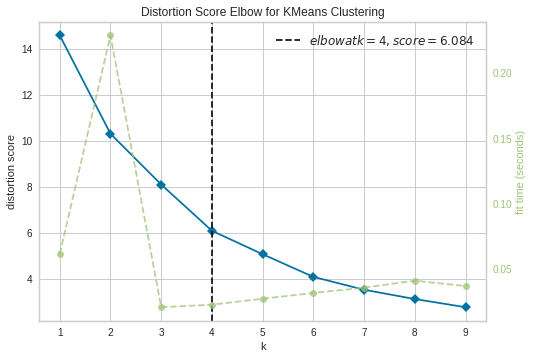

In [22]:
# visualize the elbow
grouped_aus_clustering = grouped_aus.drop('Neighborhood', 1)

visualizer.fit(grouped_aus_clustering)
visualizer.show()

In [23]:
# set the optimum clusters of neighborhoods as indicated above
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(grouped_aus_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 3, 1, 2, 1, 0, 0, 2], dtype=int32)

In [24]:
# add clustering labels
neighborhoods_venues_cluster = neighborhoods_venues_sorted.copy()
neighborhoods_venues_cluster.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_cluster.head()

Cluster Labels         Neighborhood  1st Most Common Venue  \
0               0              Bouldin  Vietnamese Restaurant   
1               0            Brentwood  Vietnamese Restaurant   
2               0  Central East Austin        Thai Restaurant   
3               3             Chestnut           Noodle House   
4               1       Coronado Hills     Chinese Restaurant   

   2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
0        Thai Restaurant        Japanese Restaurant      Sushi Restaurant   
1        Thai Restaurant          Korean Restaurant   Japanese Restaurant   
2    Japanese Restaurant         Chinese Restaurant            Restaurant   
3  Vietnamese Restaurant  Japanese Curry Restaurant       Bubble Tea Shop   
4  Vietnamese Restaurant            Thai Restaurant       Bubble Tea Shop   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0     Korean Restaurant      Ramen Restaurant          Noodle House   
1      Sushi Restaurant            Restaurant      Ramen Restaurant   
2      Ramen Restaurant          Noodle House  Himalayan Restaurant   
3  Cantonese Restaurant    Chinese Restaurant    Dim Sum Restaurant   
4  Cantonese Restaurant    Dim Sum Restaurant   Filipino Restaurant   

  8th Most Common Venue      9th Most Common Venue 10th Most Common Venue  
0   Szechuan Restaurant                 Restaurant   Taiwanese Restaurant  
1          Noodle House        Szechuan Restaurant   Taiwanese Restaurant  
2       Bubble Tea Shop       Cantonese Restaurant     Dim Sum Restaurant  
3   Filipino Restaurant       Himalayan Restaurant    Japanese Restaurant  
4  Himalayan Restaurant  Japanese Curry Restaurant    Japanese Restaurant

In [25]:
# add geographic coordinates back for each neighborhood
merged_aus = df_neiaus
merged_aus = merged_aus.join(neighborhoods_venues_cluster.set_index('Neighborhood'), on = 'Neighborhood')

# add the number of Asian restaurants nearby
merged_aus = merged_aus.merge(arnum_aus, how = 'left', left_on = 'Neighborhood', right_on = 'Neighborhood')

print(merged_aus.shape)
merged_aus.head()

(66, 15)


Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Johnston Terrace  30.258532 -97.684605             NaN   
1           Bouldin  30.251880 -97.755556             0.0   
2           MLK 183  30.278141 -97.671725             0.0   
3            Zilker  30.255278 -97.768350             0.0   
4         Crestview  30.346569 -97.725053             2.0   

   1st Most Common Venue 2nd Most Common Venue      3rd Most Common Venue  \
0                    NaN                   NaN                        NaN   
1  Vietnamese Restaurant       Thai Restaurant        Japanese Restaurant   
2  Vietnamese Restaurant       Thai Restaurant            Bubble Tea Shop   
3        Thai Restaurant   Japanese Restaurant           Ramen Restaurant   
4    Japanese Restaurant     Korean Restaurant  Japanese Curry Restaurant   

  4th Most Common Venue 5th Most Common Venue  6th Most Common Venue  \
0                   NaN                   NaN                    NaN   
1      Sushi Restaurant     Korean Restaurant       Ramen Restaurant   
2  Cantonese Restaurant    Chinese Restaurant     Dim Sum Restaurant   
3     Korean Restaurant          Noodle House  Vietnamese Restaurant   
4       Bubble Tea Shop  Cantonese Restaurant     Chinese Restaurant   

  7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
0                   NaN                   NaN                        NaN   
1          Noodle House   Szechuan Restaurant                 Restaurant   
2   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   
3            Restaurant      Sushi Restaurant        Szechuan Restaurant   
4    Dim Sum Restaurant   Filipino Restaurant       Himalayan Restaurant   

  10th Most Common Venue  Number of Asian Restaurants  
0                    NaN                          NaN  
1   Taiwanese Restaurant                         15.0  
2    Japanese Restaurant                          2.0  
3   Taiwanese Restaurant                         11.0  
4  Vietnamese Restaurant                          3.0

#### Create a dataframe with clustered neighborhoods and the number of nearby Asian restaurants for plotting

In [26]:
# reorder the added columns
cols = list(merged_aus.columns)
cols_reorder = cols[0:4:1]
cols_reorder.append(cols[14])
cols_reorder = cols_reorder + cols[4:14:1]
merged_aus = merged_aus[cols_reorder]
print(merged_aus.shape)
merged_aus.head()

(66, 15)


Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Johnston Terrace  30.258532 -97.684605             NaN   
1           Bouldin  30.251880 -97.755556             0.0   
2           MLK 183  30.278141 -97.671725             0.0   
3            Zilker  30.255278 -97.768350             0.0   
4         Crestview  30.346569 -97.725053             2.0   

   Number of Asian Restaurants  1st Most Common Venue 2nd Most Common Venue  \
0                          NaN                    NaN                   NaN   
1                         15.0  Vietnamese Restaurant       Thai Restaurant   
2                          2.0  Vietnamese Restaurant       Thai Restaurant   
3                         11.0        Thai Restaurant   Japanese Restaurant   
4                          3.0    Japanese Restaurant     Korean Restaurant   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                        NaN                   NaN                   NaN   
1        Japanese Restaurant      Sushi Restaurant     Korean Restaurant   
2            Bubble Tea Shop  Cantonese Restaurant    Chinese Restaurant   
3           Ramen Restaurant     Korean Restaurant          Noodle House   
4  Japanese Curry Restaurant       Bubble Tea Shop  Cantonese Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                    NaN                   NaN                   NaN   
1       Ramen Restaurant          Noodle House   Szechuan Restaurant   
2     Dim Sum Restaurant   Filipino Restaurant  Himalayan Restaurant   
3  Vietnamese Restaurant            Restaurant      Sushi Restaurant   
4     Chinese Restaurant    Dim Sum Restaurant   Filipino Restaurant   

       9th Most Common Venue 10th Most Common Venue  
0                        NaN                    NaN  
1                 Restaurant   Taiwanese Restaurant  
2  Japanese Curry Restaurant    Japanese Restaurant  
3        Szechuan Restaurant   Taiwanese Restaurant  
4       Himalayan Restaurant  Vietnamese Restaurant

In [27]:
# replace NaN to 5 in Cluster Labels 
# replace NaN to 0 in Number of Asian Restaurants
fill_values = {'Cluster Labels': -1.0, 'Number of Asian Restaurants': 0.0}
complete_aus = merged_aus.fillna(value = fill_values)

# make sure the cluster column is of type int
complete_aus = complete_aus.astype({"Cluster Labels": 'int32', 'Number of Asian Restaurants': 'int32'})
print(complete_aus.dtypes)
complete_aus.head()

Neighborhood                    object
Latitude                       float64
Longitude                      float64
Cluster Labels                   int32
Number of Asian Restaurants      int32
1st Most Common Venue           object
2nd Most Common Venue           object
3rd Most Common Venue           object
4th Most Common Venue           object
5th Most Common Venue           object
6th Most Common Venue           object
7th Most Common Venue           object
8th Most Common Venue           object
9th Most Common Venue           object
10th Most Common Venue          object
dtype: object


Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Johnston Terrace  30.258532 -97.684605              -1   
1           Bouldin  30.251880 -97.755556               0   
2           MLK 183  30.278141 -97.671725               0   
3            Zilker  30.255278 -97.768350               0   
4         Crestview  30.346569 -97.725053               2   

   Number of Asian Restaurants  1st Most Common Venue 2nd Most Common Venue  \
0                            0                    NaN                   NaN   
1                           15  Vietnamese Restaurant       Thai Restaurant   
2                            2  Vietnamese Restaurant       Thai Restaurant   
3                           11        Thai Restaurant   Japanese Restaurant   
4                            3    Japanese Restaurant     Korean Restaurant   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                        NaN                   NaN                   NaN   
1        Japanese Restaurant      Sushi Restaurant     Korean Restaurant   
2            Bubble Tea Shop  Cantonese Restaurant    Chinese Restaurant   
3           Ramen Restaurant     Korean Restaurant          Noodle House   
4  Japanese Curry Restaurant       Bubble Tea Shop  Cantonese Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                    NaN                   NaN                   NaN   
1       Ramen Restaurant          Noodle House   Szechuan Restaurant   
2     Dim Sum Restaurant   Filipino Restaurant  Himalayan Restaurant   
3  Vietnamese Restaurant            Restaurant      Sushi Restaurant   
4     Chinese Restaurant    Dim Sum Restaurant   Filipino Restaurant   

       9th Most Common Venue 10th Most Common Venue  
0                        NaN                    NaN  
1                 Restaurant   Taiwanese Restaurant  
2  Japanese Curry Restaurant    Japanese Restaurant  
3        Szechuan Restaurant   Taiwanese Restaurant  
4       Himalayan Restaurant  Vietnamese Restaurant

<h2><a id = "4">4. Results</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

### 4.1 Render a choropleth map with clustered markers that describes: 
* The distribution of Asian restaurants among neighborhoods with different coloring
* The number of nearby Asian restaurants in each neighborhood
* The cluster of each neighborhood which indicates similar Asian restaurant categories

In [28]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [29]:
# use geocode data to create a choropleth map with clustered markers
map_neighborhood = folium.Map(location = [latitude, longitude], zoom_start = 11) 

# [1]
geo_ausnei = r'neighborhoods_austin.geojson'

# overlay neighborhoods with numbers of nearby Asian restaurants
folium.Choropleth(
    geo_data = geo_ausnei, 
    data = complete_aus, 
    columns = ['Neighborhood', 'Number of Asian Restaurants'], 
    key_on = 'feature.properties.name', 
    fill_color = 'PuBu', 
    fill_opacity = 0.7, 
    line_opacity = 0.2, 
    legend_name = 'Number of Asian Restaurants in the Neighborhood'
).add_to(map_neighborhood)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add geocode markers
for nei, lat, lng, cluster, num in zip(complete_aus['Neighborhood'], complete_aus['Latitude'], complete_aus['Longitude'], complete_aus['Cluster Labels'], complete_aus['Number of Asian Restaurants']):
    
    # label = folium.Popup(nei + ' Cluster ' + str(cluster), parse_html = True)
    label = '<b>' + nei + '<br>' + str(num) + ' Asian Restaurant(s) Nearby<br>Cluster ' + str(cluster) + '</b>'
    if cluster == -1: 
        folium.CircleMarker(
            [lat, lng], 
            radius = 5, 
            # popup = label, 
            tooltip = label, 
            color = 'white', 
            fill = True, 
            fill_color = 'black', 
            fill_opacity = 0.7).add_to(map_neighborhood)         
    else: 
        folium.CircleMarker(
            [lat, lng], 
            radius = 5, 
            # popup = label, 
            tooltip = label, 
            color = 'white', 
            fill = True, 
            fill_color = rainbow[cluster - 1], 
            fill_opacity = 0.7).add_to(map_neighborhood) 

map_neighborhood

In [30]:
# as folium maps will not display on GitHub, save it as an html file then display
map_neighborhood.save('html_capstone.html')

In [31]:
import webbrowser

In [32]:
# opens a new tab to display the map
webbrowser.open("html_capstone.html")

True

In [33]:
from IPython.display import Image

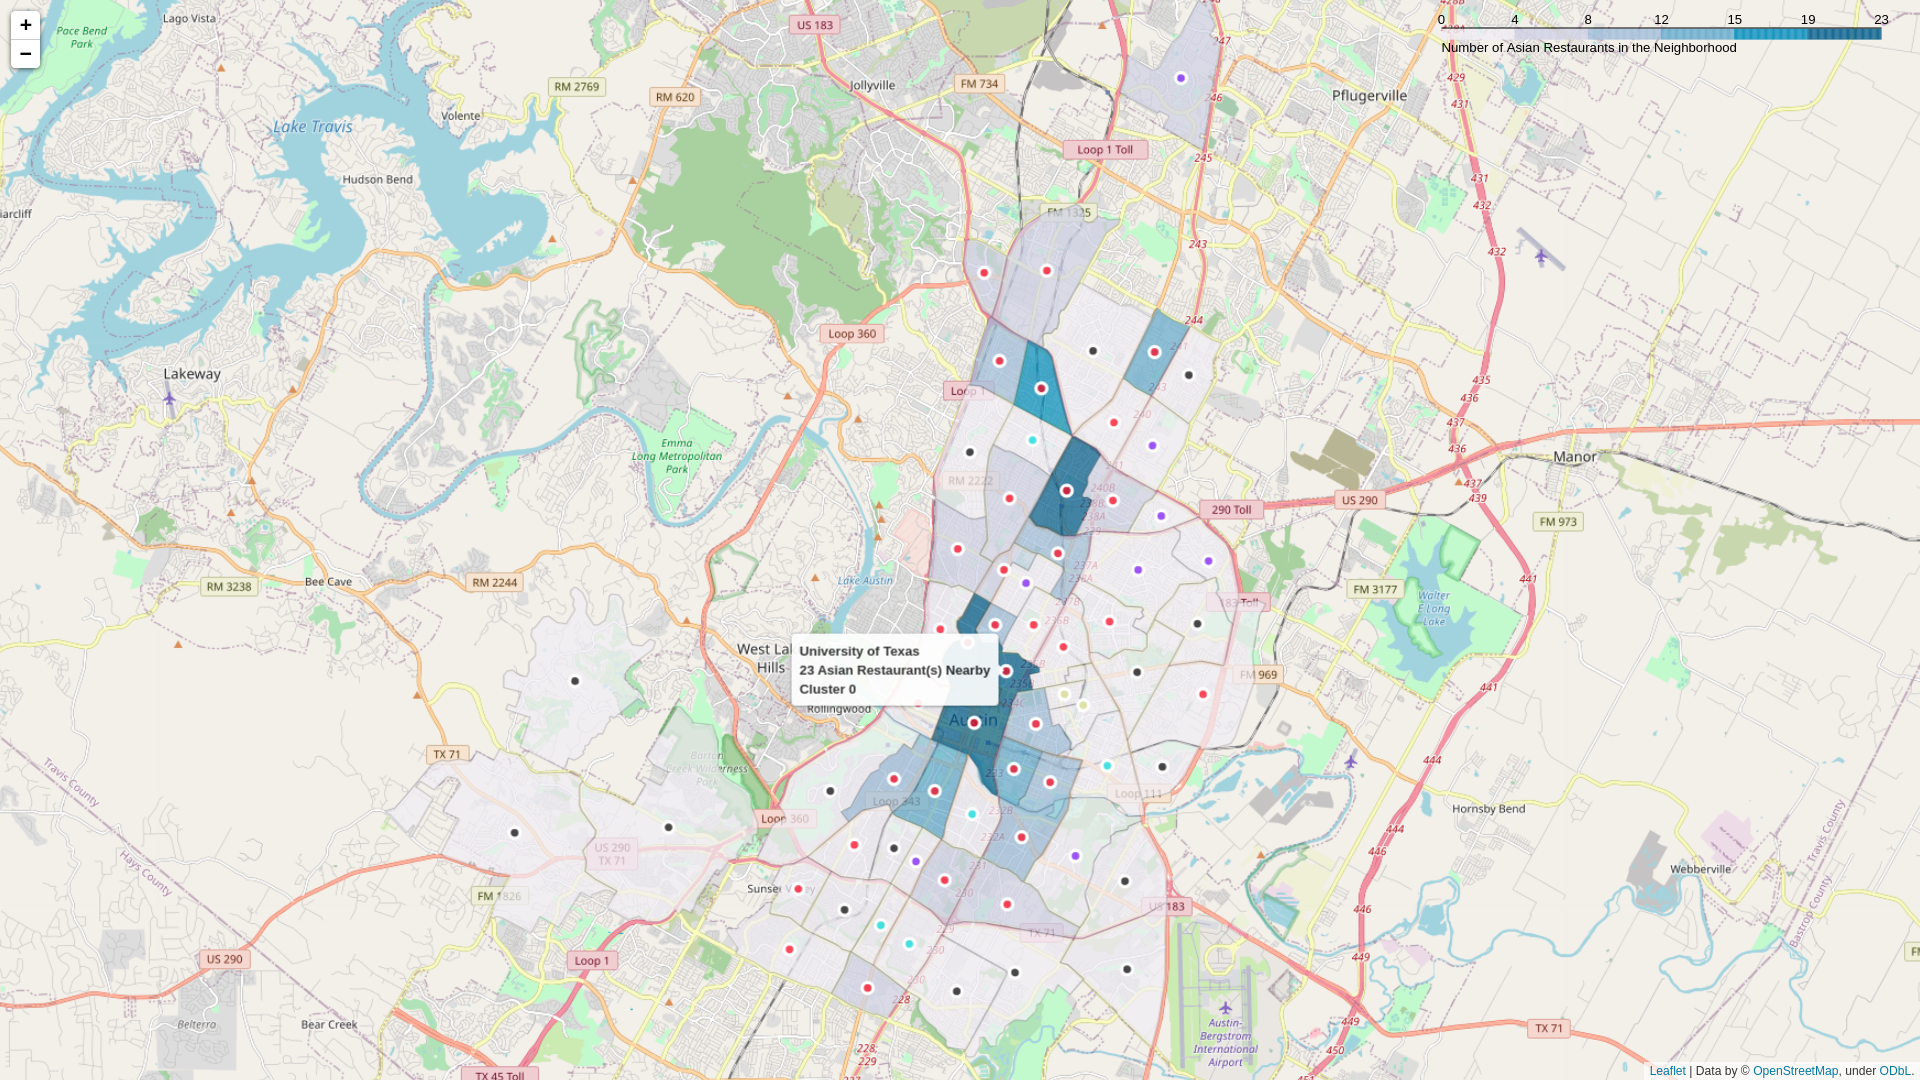

In [34]:
# in case GitHub does not render the map
# I took a screenshot from my browser and displayed it here
Image(filename = 'screenshot_capstone.png')

In [35]:
from IPython.display import Video

#### The video demo below describes how to utilize the map as an interactive tool for more information. 

In [36]:
# in case GitHub does not render the map
# I recorded my screen from my browser and displayed a video demo here
Video('screenrecord_capstone.webm', width = 960, height = 540)

### 4.2 Make a list of clustered neighborhoods

#### By simply observing the 3 most common venues for neighborhoods in the same cluster, we can see they have similar Asian restaurant categories in common. In the Discussion section, I will visualize based on the results to reveal this observation. 

### Cluster 0: 

In [37]:
complete_aus.loc[complete_aus['Cluster Labels'] == 0, complete_aus.columns[[0] + list(range(3, complete_aus.shape[1]))]]

Neighborhood  Cluster Labels  Number of Asian Restaurants  \
1               Bouldin               0                           15   
2               MLK 183               0                            2   
3                Zilker               0                           11   
6           South Lamar               0                            3   
7              Rosedale               0                            6   
8             Riverside               0                           10   
10  Central East Austin               0                            9   
11      Old West Austin               0                            3   
12          Sweet Briar               0                            5   
14    Upper Boggy Creek               0                            2   
15       Georgian Acres               0                            2   
19          North Lamar               0                           13   
20    East Cesar Chavez               0                           14   
21             Highland               0                           20   
22          St. Edwards               0                            4   
25     North University               0                           11   
30            St. Johns               0                            5   
31            West Gate               0                            3   
32    North Shoal Creek               0                            9   
33              Hancock               0                            2   
35      West University               0                           21   
36         Windsor Road               0                            2   
38          Parker Lane               0                            6   
39        North Burnett               0                            7   
40       Triangle State               0                            7   
41                Holly               0                           10   
42             Downtown               0                           23   
44           North Loop               0                            9   
46  University of Texas               0                           23   
51              Gateway               0                            6   
57        Garrison Park               0                            2   
59            Brentwood               0                            6   
61                 RMMA               0                            3   
64               Wooten               0                           17   

    1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
1   Vietnamese Restaurant        Thai Restaurant    Japanese Restaurant   
2   Vietnamese Restaurant        Thai Restaurant        Bubble Tea Shop   
3         Thai Restaurant    Japanese Restaurant       Ramen Restaurant   
6     Japanese Restaurant        Thai Restaurant     Chinese Restaurant   
7     Japanese Restaurant       Sushi Restaurant     Chinese Restaurant   
8      Chinese Restaurant        Thai Restaurant  Vietnamese Restaurant   
10        Thai Restaurant    Japanese Restaurant     Chinese Restaurant   
11    Japanese Restaurant       Sushi Restaurant     Chinese Restaurant   
12      Korean Restaurant       Sushi Restaurant     Chinese Restaurant   
14    Japanese Restaurant     Chinese Restaurant        Thai Restaurant   
15  Vietnamese Restaurant     Chinese Restaurant        Thai Restaurant   
19  Vietnamese Restaurant      Korean Restaurant     Chinese Restaurant   
20        Thai Restaurant  Vietnamese Restaurant             Restaurant   
21      Korean Restaurant     Chinese Restaurant  Vietnamese Restaurant   
22  Vietnamese Restaurant     Chinese Restaurant        Thai Restaurant   
25        Thai Restaurant  Vietnamese Restaurant      Korean Restaurant   
30      Korean Restaurant       Sushi Restaurant     Chinese Restaurant   
31    Szechuan Restaurant       Sushi Restaurant        Thai Restaurant   
32    Japanese Restaurant     Chinese Restaurant      Korean Rest

### Cluster 1: 

In [38]:
complete_aus.loc[complete_aus['Cluster Labels'] == 1, complete_aus.columns[[0] + list(range(3, complete_aus.shape[1]))]]

Neighborhood  Cluster Labels  Number of Asian Restaurants  \
9       Wells Branch               1                            4   
37    Heritage Hills               1                            1   
43   Pleasant Valley               1                            1   
48         Hyde Park               1                            1   
52  University Hills               1                            1   
53            Dawson               1                            3   
58    Coronado Hills               1                            1   
63      Windsor Park               1                            1   

   1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
9     Chinese Restaurant      Korean Restaurant  Vietnamese Restaurant   
37    Chinese Restaurant  Vietnamese Restaurant        Thai Restaurant   
43    Chinese Restaurant  Vietnamese Restaurant        Thai Restaurant   
48    Chinese Restaurant  Vietnamese Restaurant        Thai Restaurant   
52    Chinese Restaurant  Vietnamese Restaurant        Thai Restaurant   
53    Chinese Restaurant  Vietnamese Restaurant        Thai Restaurant   
58    Chinese Restaurant  Vietnamese Restaurant        Thai Restaurant   
63    Chinese Restaurant  Vietnamese Restaurant        Thai Restaurant   

        4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
9   Japanese Curry Restaurant       Bubble Tea Shop  Cantonese Restaurant   
37            Bubble Tea Shop  Cantonese Restaurant    Dim Sum Restaurant   
43            Bubble Tea Shop  Cantonese Restaurant    Dim Sum Restaurant   
48            Bubble Tea Shop  Cantonese Restaurant    Dim Sum Restaurant   
52            Bubble Tea Shop  Cantonese Restaurant    Dim Sum Restaurant   
53            Bubble Tea Shop  Cantonese Restaurant    Dim Sum Restaurant   
58            Bubble Tea Shop  Cantonese Restaurant    Dim Sum Restaurant   
63            Bubble Tea Shop  Cantonese Restaurant    Dim Sum Restaurant   

   7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
9     Dim Sum Restaurant   Filipino Restaurant       Himalayan Restaurant   
37   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   
43   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   
48   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   
52   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   
53   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   
58   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   
63   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   

   10th Most Common Venue  
9     Japanese Restaurant  
37    Japanese Restaurant  
43    Japanese Restaurant  
48    Japanese Restaurant  
52    Japanese Restaurant  
53    Japanese Restaurant  
58    Japanese Restaurant  
63    Japanese Restaurant

### Cluster 2: 

In [39]:
complete_aus.loc[complete_aus['Cluster Labels'] == 2, complete_aus.columns[[0] + list(range(3, complete_aus.shape[1]))]]

Neighborhood  Cluster Labels  Number of Asian Restaurants  \
4          Crestview               2                            3   
18  South River City               2                            2   
50     East Congress               2                            2   
56           Govalle               2                            1   
65     West Congress               2                            1   

   1st Most Common Venue 2nd Most Common Venue      3rd Most Common Venue  \
4    Japanese Restaurant     Korean Restaurant  Japanese Curry Restaurant   
18   Japanese Restaurant      Sushi Restaurant  Japanese Curry Restaurant   
50   Japanese Restaurant     Korean Restaurant  Japanese Curry Restaurant   
56   Japanese Restaurant       Thai Restaurant            Bubble Tea Shop   
65   Japanese Restaurant       Thai Restaurant            Bubble Tea Shop   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
4        Bubble Tea Shop  Cantonese Restaurant    Chinese Restaurant   
18       Bubble Tea Shop  Cantonese Restaurant    Chinese Restaurant   
50       Bubble Tea Shop  Cantonese Restaurant    Chinese Restaurant   
56  Cantonese Restaurant    Chinese Restaurant    Dim Sum Restaurant   
65  Cantonese Restaurant    Chinese Restaurant    Dim Sum Restaurant   

   7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
4     Dim Sum Restaurant   Filipino Restaurant       Himalayan Restaurant   
18    Dim Sum Restaurant   Filipino Restaurant       Himalayan Restaurant   
50    Dim Sum Restaurant   Filipino Restaurant       Himalayan Restaurant   
56   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   
65   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant   

   10th Most Common Venue  
4   Vietnamese Restaurant  
18  Vietnamese Restaurant  
50  Vietnamese Restaurant  
56  Vietnamese Restaurant  
65  Vietnamese Restaurant

### Cluster 3: 

In [40]:
complete_aus.loc[complete_aus['Cluster Labels'] == 3, complete_aus.columns[[0] + list(range(3, complete_aus.shape[1]))]]

Neighborhood  Cluster Labels  Number of Asian Restaurants  \
16     Chestnut               3                            1   
49     Rosewood               3                            1   

   1st Most Common Venue  2nd Most Common Venue      3rd Most Common Venue  \
16          Noodle House  Vietnamese Restaurant  Japanese Curry Restaurant   
49          Noodle House  Vietnamese Restaurant  Japanese Curry Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
16       Bubble Tea Shop  Cantonese Restaurant    Chinese Restaurant   
49       Bubble Tea Shop  Cantonese Restaurant    Chinese Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
16    Dim Sum Restaurant   Filipino Restaurant  Himalayan Restaurant   
49    Dim Sum Restaurant   Filipino Restaurant  Himalayan Restaurant   

   10th Most Common Venue  
16    Japanese Restaurant  
49    Japanese Restaurant

### Cluster -1: No Asian Restaurants Nearby

In [41]:
complete_aus.loc[complete_aus['Cluster Labels'] == -1, complete_aus.columns[[0] + list(range(3, complete_aus.shape[1]))]]

Neighborhood  Cluster Labels  Number of Asian Restaurants  \
0           Johnston Terrace              -1                            0   
5                Onion Creek              -1                            0   
13              Barton Creek              -1                            0   
17             Windsor Hills              -1                            0   
23             East Oak Hill              -1                            0   
24                Montopolis              -1                            0   
26                 Allandale              -1                            0   
27                 Southeast              -1                            0   
28                       MLK              -1                            0   
29              Barton Hills              -1                            0   
34              North Austin              -1                            0   
45                   Galindo              -1                            0   
47            South Manchaca              -1                            0   
54                  Mckinney              -1                            0   
55  Pecan Springs Springdale              -1                            0   
60             Franklin Park              -1                            0   
62             West Oak Hill              -1                            0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                    NaN                   NaN                   NaN   
5                    NaN                   NaN                   NaN   
13                   NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
23                   NaN                   NaN                   NaN   
24                   NaN                   NaN                   NaN   
26                   NaN                   NaN                   NaN   
27                   NaN                   NaN                   NaN   
28                   NaN                   NaN                   NaN   
29                   NaN                   NaN                   NaN   
34                   NaN                   NaN                   NaN   
45                   NaN                   NaN                   NaN   
47                   NaN                   NaN                   NaN   
54                   NaN                   NaN                   NaN   
55                   NaN                   NaN                   NaN   
60                   NaN                   NaN                   NaN   
62                   NaN                   NaN                   NaN   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                    NaN                   NaN                   NaN   
5                    NaN                   NaN                   NaN   
13                   NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
23                   NaN                   NaN                   NaN   
24                   NaN                   NaN                   NaN   
26                   NaN                   NaN                   NaN   
27                   NaN                   NaN                   NaN   
28                   NaN                   NaN                   NaN   
29                   NaN                   NaN                   NaN   
34                   NaN                   NaN                   NaN   
45                   NaN                   NaN                   NaN   
47                   NaN                   NaN                   NaN   
54                   NaN                   NaN                   NaN   
55                   NaN                   NaN                   NaN   
60                   NaN                   NaN                   NaN   
62                   NaN                   NaN                   NaN   

   7th Most Common Venue 8th Most C

In [42]:
# visualize each cluster
freq_aus = grouped_aus.copy()
print(freq_aus.shape)
freq_aus.head()

(49, 19)


Neighborhood  Asian Restaurant  Bubble Tea Shop  \
0              Bouldin               0.0              0.0   
1            Brentwood               0.0              0.0   
2  Central East Austin               0.0              0.0   
3             Chestnut               0.0              0.0   
4       Coronado Hills               0.0              0.0   

   Cantonese Restaurant  Chinese Restaurant  Dim Sum Restaurant  \
0                   0.0            0.000000                 0.0   
1                   0.0            0.000000                 0.0   
2                   0.0            0.111111                 0.0   
3                   0.0            0.000000                 0.0   
4                   0.0            1.000000                 0.0   

   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant  \
0                  0.0                   0.0                        0.0   
1                  0.0                   0.0                        0.0   
2                  0.0                   0.0                        0.0   
3                  0.0                   0.0                        0.0   
4                  0.0                   0.0                        0.0   

   Japanese Restaurant  Korean Restaurant  Noodle House  Ramen Restaurant  \
0             0.200000           0.133333      0.066667          0.066667   
1             0.166667           0.166667      0.000000          0.000000   
2             0.111111           0.000000      0.111111          0.111111   
3             0.000000           0.000000      1.000000          0.000000   
4             0.000000           0.000000      0.000000          0.000000   

   Restaurant  Sushi Restaurant  Szechuan Restaurant  Taiwanese Restaurant  \
0    0.000000          0.133333                  0.0                   0.0   
1    0.000000          0.000000                  0.0                   0.0   
2    0.111111          0.000000                  0.0                   0.0   
3    0.000000          0.000000                  0.0                   0.0   
4    0.000000          0.000000                  0.0                   0.0   

   Thai Restaurant  Vietnamese Restaurant  
0         0.200000               0.200000  
1         0.333333               0.333333  
2         0.444444               0.000000  
3         0.000000               0.000000  
4         0.000000               0.000000

In [43]:
# add the cluster column
freq_aus = freq_aus.merge(complete_aus[['Neighborhood', 'Cluster Labels']], how = 'left', on = 'Neighborhood')

# reorder columns
cols = list(freq_aus.columns)
cols_reorder = cols[0:1:1]
cols_reorder.append(cols[19])
cols_reorder = cols_reorder + cols[1:19:1]
freq_aus = freq_aus[cols_reorder]

print(freq_aus.shape)
freq_aus.head()

(49, 20)


Neighborhood  Cluster Labels  Asian Restaurant  Bubble Tea Shop  \
0              Bouldin               0               0.0              0.0   
1            Brentwood               0               0.0              0.0   
2  Central East Austin               0               0.0              0.0   
3             Chestnut               3               0.0              0.0   
4       Coronado Hills               1               0.0              0.0   

   Cantonese Restaurant  Chinese Restaurant  Dim Sum Restaurant  \
0                   0.0            0.000000                 0.0   
1                   0.0            0.000000                 0.0   
2                   0.0            0.111111                 0.0   
3                   0.0            0.000000                 0.0   
4                   0.0            1.000000                 0.0   

   Filipino Restaurant  Himalayan Restaurant  Japanese Curry Restaurant  \
0                  0.0                   0.0                        0.0   
1                  0.0                   0.0                        0.0   
2                  0.0                   0.0                        0.0   
3                  0.0                   0.0                        0.0   
4                  0.0                   0.0                        0.0   

   Japanese Restaurant  Korean Restaurant  Noodle House  Ramen Restaurant  \
0             0.200000           0.133333      0.066667          0.066667   
1             0.166667           0.166667      0.000000          0.000000   
2             0.111111           0.000000      0.111111          0.111111   
3             0.000000           0.000000      1.000000          0.000000   
4             0.000000           0.000000      0.000000          0.000000   

   Restaurant  Sushi Restaurant  Szechuan Restaurant  Taiwanese Restaurant  \
0    0.000000          0.133333                  0.0                   0.0   
1    0.000000          0.000000                  0.0                   0.0   
2    0.111111          0.000000                  0.0                   0.0   
3    0.000000          0.000000                  0.0                   0.0   
4    0.000000          0.000000                  0.0                   0.0   

   Thai Restaurant  Vietnamese Restaurant  
0         0.200000               0.200000  
1         0.333333               0.333333  
2         0.444444               0.000000  
3         0.000000               0.000000  
4         0.000000               0.000000

In [44]:
# segment the dataframe by clusters
freq_aus0 = freq_aus.loc[freq_aus['Cluster Labels'] == 0]
print('{} neighborhoods are in Cluster {}.'.format(freq_aus0.shape[0], freq_aus0['Cluster Labels'].unique()))

freq_aus1 = freq_aus.loc[freq_aus['Cluster Labels'] == 1]
print('{} neighborhoods are in Cluster {}.'.format(freq_aus1.shape[0], freq_aus1['Cluster Labels'].unique()))

freq_aus2 = freq_aus.loc[freq_aus['Cluster Labels'] == 2]
print('{} neighborhoods are in Cluster {}.'.format(freq_aus2.shape[0], freq_aus2['Cluster Labels'].unique()))

freq_aus3 = freq_aus.loc[freq_aus['Cluster Labels'] == 3]
print('{} neighborhoods are in Cluster {}.'.format(freq_aus3.shape[0], freq_aus3['Cluster Labels'].unique()))

34 neighborhoods are in Cluster [0].
8 neighborhoods are in Cluster [1].
5 neighborhoods are in Cluster [2].
2 neighborhoods are in Cluster [3].


In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [46]:
# create dataframes for plots by clusters 
freq_aus0.loc['Frequency'] = freq_aus0.mean(axis = 0)

ave_freq_aus0 = freq_aus0[34:35]
ave_freq_aus0 = ave_freq_aus0.transpose()
ave_freq_aus0 = ave_freq_aus0.drop(['Neighborhood', 'Cluster Labels'])
ave_freq_aus0 = ave_freq_aus0.sort_values(by = ['Frequency'], ascending = False)
ave_freq_aus0

/home/andersen97/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Frequency
Chinese Restaurant           0.231171
Thai Restaurant              0.173453
Vietnamese Restaurant        0.162999
Japanese Restaurant          0.147161
Sushi Restaurant            0.0973161
Korean Restaurant           0.0951052
Noodle House                0.0332274
Ramen Restaurant            0.0158079
Szechuan Restaurant         0.0110827
Filipino Restaurant        0.00816993
Restaurant                 0.00746965
Himalayan Restaurant       0.00407436
Cantonese Restaurant       0.00354122
Taiwanese Restaurant       0.00274936
Dim Sum Restaurant         0.00226244
Bubble Tea Shop             0.0017301
Asian Restaurant           0.00140056
Japanese Curry Restaurant  0.00127877

In [47]:
freq_aus1.loc['Frequency'] = freq_aus1.mean(axis = 0)

ave_freq_aus1 = freq_aus1[8:9]
ave_freq_aus1 = ave_freq_aus1.transpose()
ave_freq_aus1 = ave_freq_aus1.drop(['Neighborhood', 'Cluster Labels'])
ave_freq_aus1 = ave_freq_aus1.sort_values(by = ['Frequency'], ascending = False)
ave_freq_aus1

/home/andersen97/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Frequency
Chinese Restaurant          0.927083
Vietnamese Restaurant      0.0416667
Korean Restaurant            0.03125
Cantonese Restaurant               0
Dim Sum Restaurant                 0
Filipino Restaurant                0
Himalayan Restaurant               0
Japanese Curry Restaurant          0
Japanese Restaurant                0
Bubble Tea Shop                    0
Noodle House                       0
Ramen Restaurant                   0
Restaurant                         0
Sushi Restaurant                   0
Szechuan Restaurant                0
Taiwanese Restaurant               0
Thai Restaurant                    0
Asian Restaurant                   0

In [48]:
freq_aus2.loc['Frequency'] = freq_aus2.mean(axis = 0)

ave_freq_aus2 = freq_aus2[5:6]
ave_freq_aus2 = ave_freq_aus2.transpose()
ave_freq_aus2 = ave_freq_aus2.drop(['Neighborhood', 'Cluster Labels'])
ave_freq_aus2 = ave_freq_aus2.sort_values(by = ['Frequency'], ascending = False)
ave_freq_aus2

/home/andersen97/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Frequency
Japanese Restaurant        0.733333
Korean Restaurant          0.166667
Sushi Restaurant                0.1
Noodle House                      0
Thai Restaurant                   0
Taiwanese Restaurant              0
Szechuan Restaurant               0
Restaurant                        0
Ramen Restaurant                  0
Asian Restaurant                  0
Bubble Tea Shop                   0
Japanese Curry Restaurant         0
Himalayan Restaurant              0
Filipino Restaurant               0
Dim Sum Restaurant                0
Chinese Restaurant                0
Cantonese Restaurant              0
Vietnamese Restaurant             0

In [49]:
freq_aus3.loc['Frequency'] = freq_aus3.mean(axis = 0)

ave_freq_aus3 = freq_aus3[2:3]
ave_freq_aus3 = ave_freq_aus3.transpose()
ave_freq_aus3 = ave_freq_aus3.drop(['Neighborhood', 'Cluster Labels'])
ave_freq_aus3 = ave_freq_aus3.sort_values(by = ['Frequency'], ascending = False)
ave_freq_aus3

/home/andersen97/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Frequency
Noodle House                      1
Asian Restaurant                  0
Bubble Tea Shop                   0
Thai Restaurant                   0
Taiwanese Restaurant              0
Szechuan Restaurant               0
Sushi Restaurant                  0
Restaurant                        0
Ramen Restaurant                  0
Korean Restaurant                 0
Japanese Restaurant               0
Japanese Curry Restaurant         0
Himalayan Restaurant              0
Filipino Restaurant               0
Dim Sum Restaurant                0
Chinese Restaurant                0
Cantonese Restaurant              0
Vietnamese Restaurant             0

<h2><a id = "5">5. Discussion</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

#### Order the Asian restaurant categories by averaged frequency. Then draw bar charts for each cluster to get insights. 

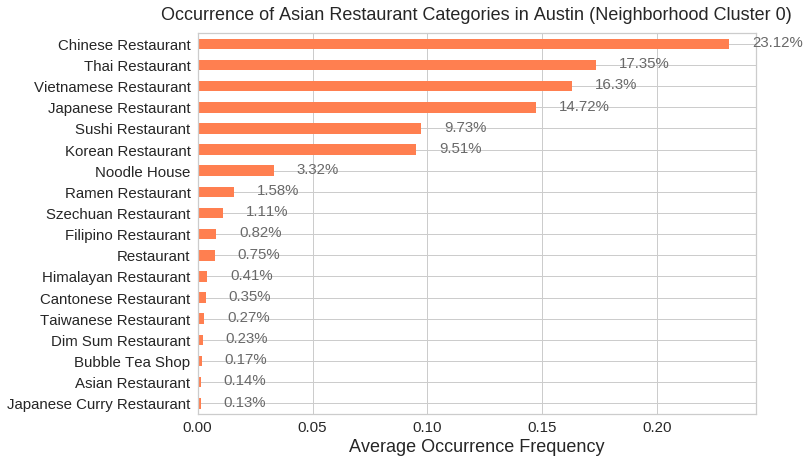

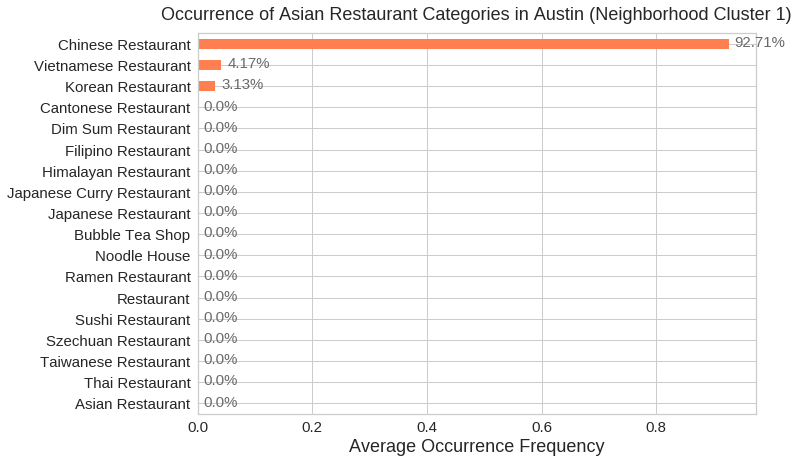

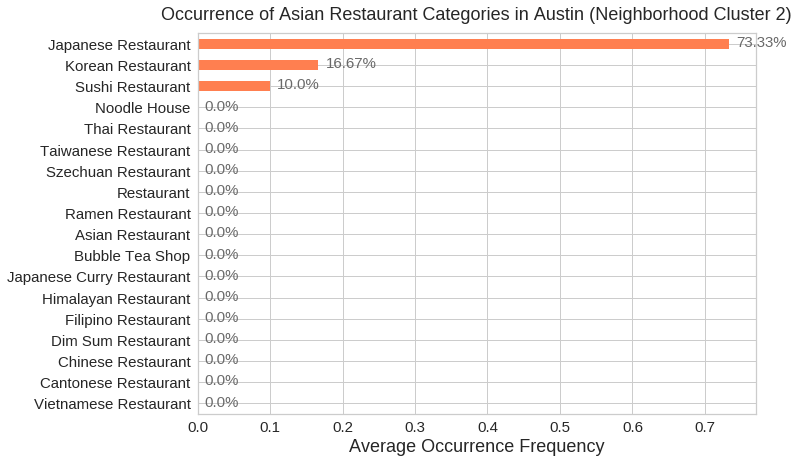

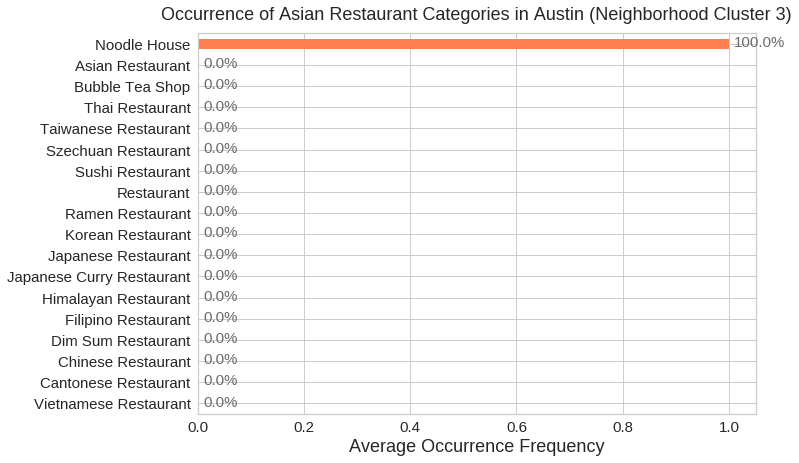

In [50]:
# draw all the bar plots
for ave_freq, cluster in zip((ave_freq_aus0, ave_freq_aus1, ave_freq_aus2, ave_freq_aus3), range(0, 4)):
    ax0 = ave_freq.plot(kind = 'barh', figsize = (10, 7), color = "coral", fontsize = 15)
    ax0.set_alpha(0.8)
    ax0.set_title('Occurrence of Asian Restaurant Categories in Austin (Neighborhood Cluster ' + str(cluster) + ')', fontsize = 18)
    ax0.set_xlabel('Average Occurrence Frequency', fontsize = 18)

    totals = []

    # find the values and append to list
    for i in ax0.patches:
        totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax0.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax0.text(i.get_width() + 0.01, i.get_y() + 0.38, str(round((i.get_width() / total) * 100, 2)) + '%', fontsize = 15, color = 'dimgrey')

    # tune the appearance
    ttl = ax0.title
    ttl.set_position([0.5, 1.02])
    ax0.get_legend().remove()

    # invert for largest on top 
    ax0.invert_yaxis()

#### With above bar plots, we can now name out clusters.
* Cluster 0: Mainstream and Diverse Asian Restaurants
* Cluster 1: Chinese Restaurants
* Cluster 2: Japanese Restaurants
* Cluster 3: Noodle House

#### Based on the map and visualizations above, we have the following observations: 
* Almost half of neighborhoods (34 out of 66) in Austin have relatively diverse Asian restaurant categories nearby (within 1000 meters from neighborhood's central location)
* Around a quarter of neighborhoods (15 out of 66) in Austin have relatively identical Asian restaurant categories (within 1000 meters)
* Around a quarter of neighborhoods (17 out of 66) in Austin have no Asian restaurants nearby (within 1000 meters)
* Asian restaurants in Austin are mainly distributed along Interstate 35 which is the highway that cuts through the heart of downtown Austin
* Mainstream Asian restaurant categories in Austin are: Vietnamese, Thai, Chinese, Japanese, and Korean
* Regardless of clusters, the frequency of a neighborhood with Chinese restaurants nearby is dominant

<h2><a id = "6">6. Conclusion</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

Investors can decide where to open Asian restaurants based on the distribution, density, and the type of existing Asian restaurants in Austin neighborhoods. Recommendations can be made with the help of observations from the results. As mentioned at the beginning of this report, there are many factors to consider when opening a business. Observations from this report can only assist in giving basic information on a general perspective; further research can be done using data science from a different perspective. 

Several areas for future improvement: 

1. Display the Top 3 Asian restaurants as pop-up text on the marker of each neighborhood (by requesting venues ratings based on venue IDs on `FourSquare API`)
2. Explore other types of diverse restaurants, i.e., Indian restaurants, middle eastern, Turkish, and etc.
3. Explore and analyze neighborhoods in Round Rock-Austin metropolitan area
3. Consider other factors that may determine the location and category of opening a restaurant, i.e., population density, crime rate. `folium` map is a versatile tool that can be used to overlay multiple layers of GeoJSON data for visualization

****

<h2><a id = "7">7. References</a>&emsp;<a href = "#0" style = "text-decoration:none;">↑</a></h2>

[1]. Austin, Texas, Wikipedia. Retrieved from: https://en.wikipedia.org/wiki/Austin,_Texas<br>
[2]. The Asian Community in Austin: a Demographic Snapshot, The City of Austin. Retrieved from: https://austintexas.gov/<br>
[3]. Austin Travis TX US Neighborhoods, OpenDataSoft. Retrieved from: https://public.opendatasoft.com/explore/dataset/zillow-neighborhoods/export/?refine.state=TX&refine.county=Travis&refine.city=Austin<br>
[4]. Queried Asian Restaurant Recommendations within 1000 Meters of Each Neighborhood in Austin, FourSquare API. Retrieved from: https://developer.foursquare.com/docs/api-reference/venues/explore/<br>